## Create PyWGCNA object

In [57]:
import PyWGCNA
import pandas as pd
TPM = pd.read_csv("expressionList_sorted.csv", index_col=0).T
modelAD = PyWGCNA.WGCNA(name='modelAD_cuprizone_12mon', 
                        species='Mouse', geneExp=TPM, save=True)

Saving data to be True, checking requirements ...


## Preprocess including remove outlier genes and samples

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



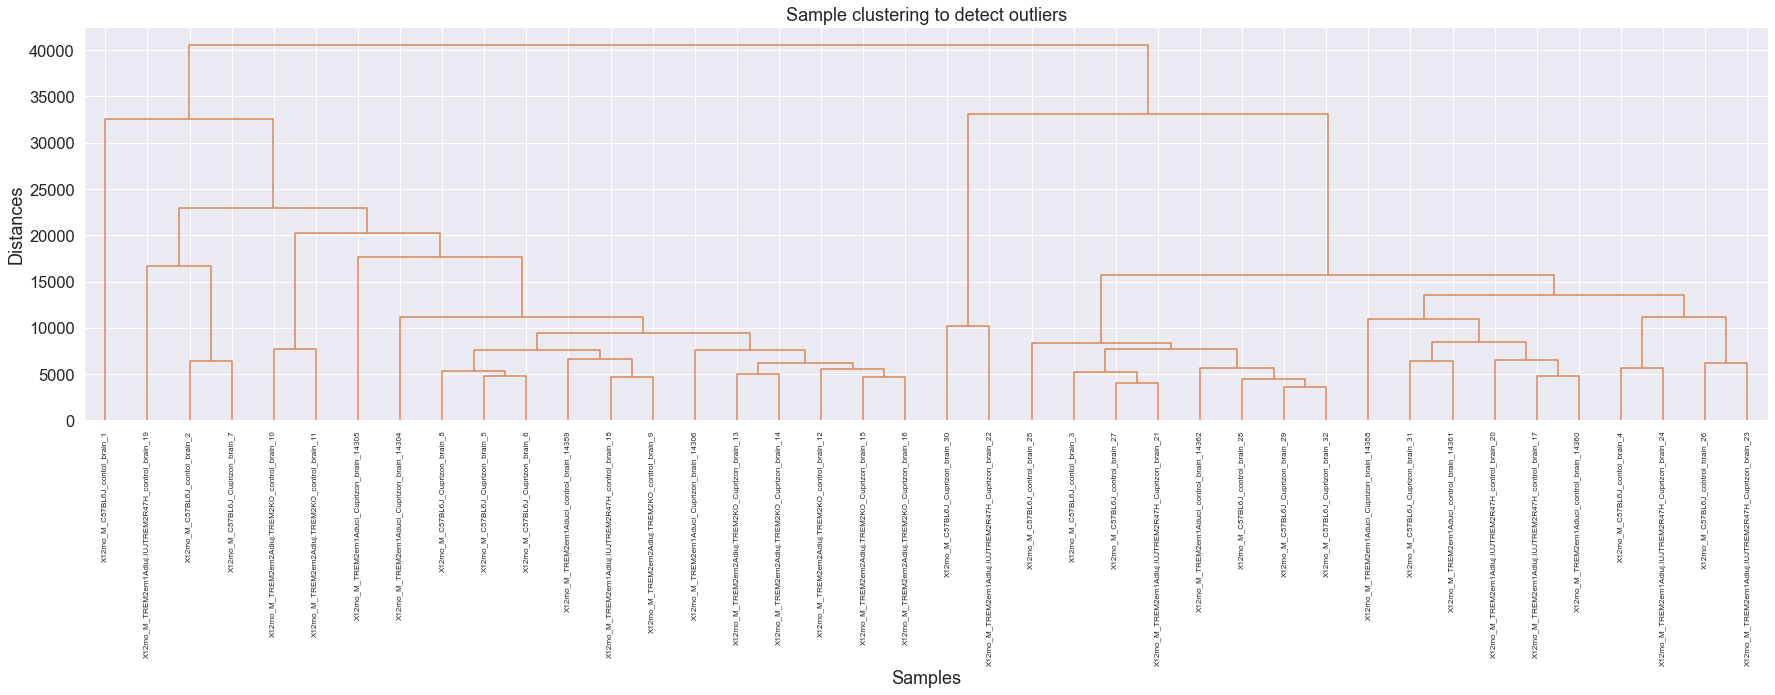

In [58]:
## Preprocess including remove outlier genes and samples
modelAD.preprocess()

## Running PyWGCNA and finding modules

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2182
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.203402 -1.574887       0.930181  1881.521294  1868.380175   
1       2  0.534364 -1.950551       0.898233   578.497665   533.925441   
2       3  0.729572 -1.797273       0.947653   231.837805   188.554933   
3       4   0.83245 -1.755529       0.980987   110.552367    77.612282   
4       5  0.857365 -1.817097       0.981222    59.651635    36.099059   
5       6  0.874671 -1.844047       0.980303    35.287013    18.503717   
6       7  0.876637 -1.851457       0.974153    22.404876     9.929603   
7       8  0.901712 -1.805545       0.982652    15.045395     5.528476   
8       9  0.916185 -1.771705       0.987307    10.573578     3.202144   
9      10  0.926508  -1.72827        0.99051     7.717008     1.899704   
10     11  0.925498  -1.72137        0.99119     5.815396      1.15705   
11     13

Trying to set attribute `.var` of view, copying.


	Done..

Calculating 61 module eigengenes in given set...
	Done..

mergeCloseModules: Merging modules whose distance is less than 0.5
fixDataStructure: data is not a Dictionary: converting it into one.
multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 61 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 57 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 53 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 52 module eigengenes in given set...
	Done..

  Calculating new MEs...
multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 52 module eigengenes in given set...
	Done..

Calculating 52 module eigengenes in given set...
	Done..

fixDataStructure: data is not a Dictionary: converting it into one.
orderMEs: order not given, calculating using given set 0


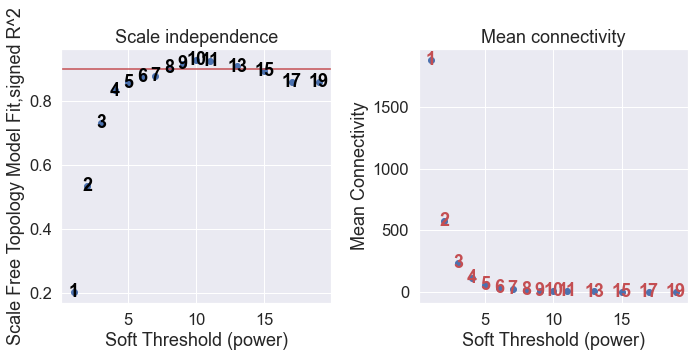

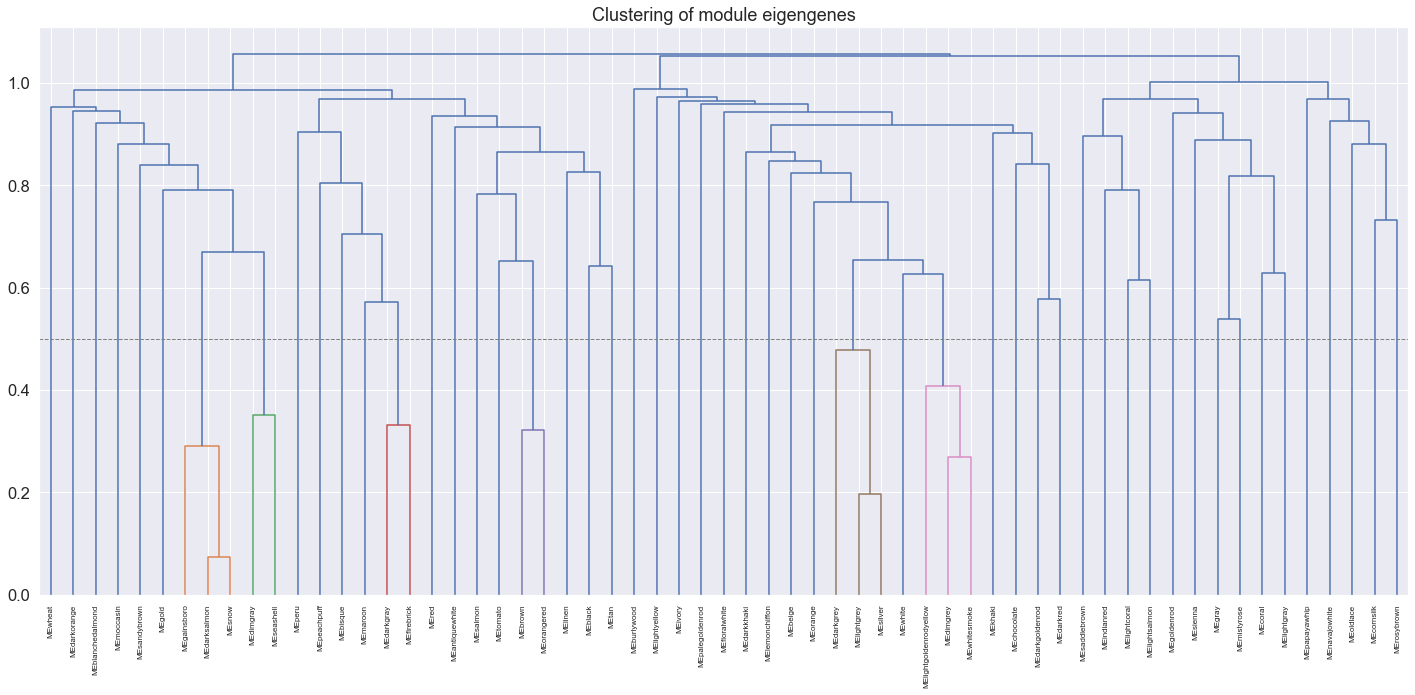

In [59]:
## Running PyWGCNA and finding modules
modelAD.findModules()

## Analysing results including ploting module-trait relationship heatmap, eigengen heatmap and barplot, and Go term analysis for each module

all the figures save into figure folder near this notebook.

In [60]:
## Analysing results including ploting module-trait relationship heatmap, eigengen heatmap and barplot, and Go term analysis for each module
## all the figures save into figure folder near this notebook.
import numpy as np
import pandas as pd
import random

metaData = pd.read_csv("data/experimentList_sorted", sep='\t')
metaData.drop(['V1', 'V2', 'V5', 'V6'], axis=1, inplace=True)
metaData.columns = ['Genotype', 'Group']
metaData['Group'] = metaData['Group'].str.replace('contol','Control')
metaData['Group'] = metaData['Group'].str.replace('control','Control')
metaData.to_csv('data/experimentList_sorted_corrected', index=False, sep="\t")
metaData = pd.read_csv("data/experimentList_sorted_corrected", 
                       sep='\t')
Genotype = {}
for name in np.unique(metaData['Genotype']):
    Genotype[name] = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

Updating gene information based on given gene list ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Go term analysis for each module...


2022-07-20 10:39:37,163 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5
2022-07-20 10:39:45,507 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5
2022-07-20 10:39:56,148 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5
2022-07-20 10:42:06,794 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5
2022-07-20 10:43:01,130 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5
2022-07-20 10:43:32,202 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5
2022-07-20 10:43:43,198 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5


	Done..



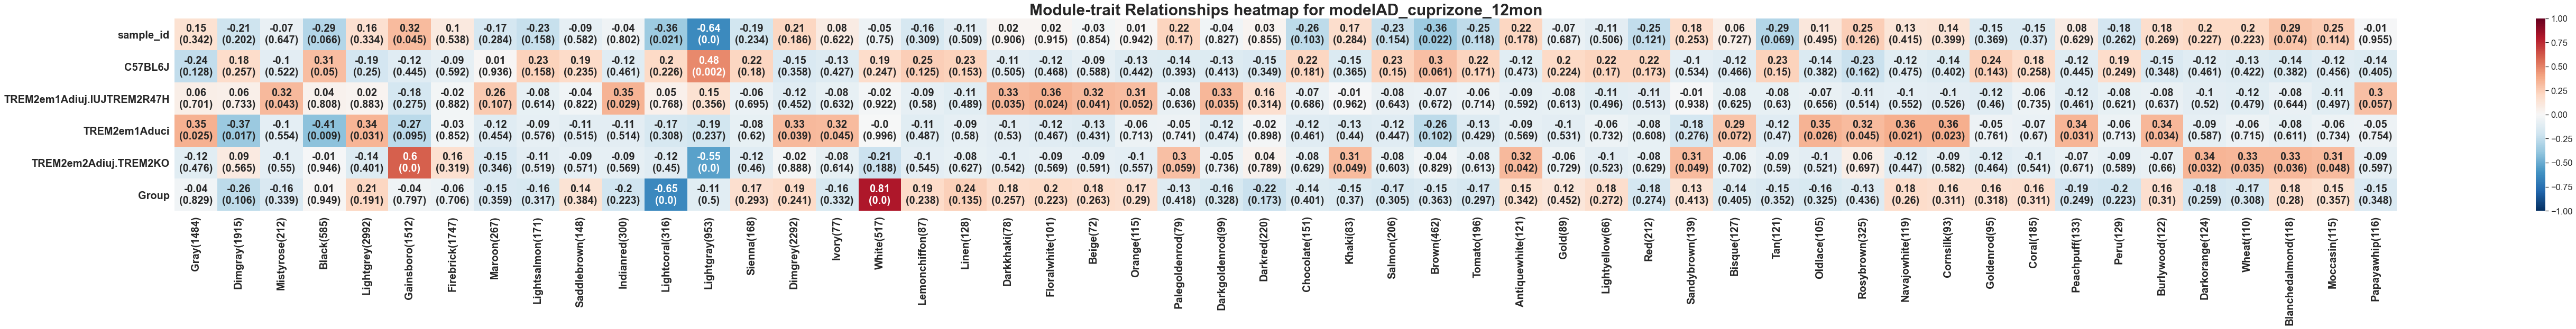

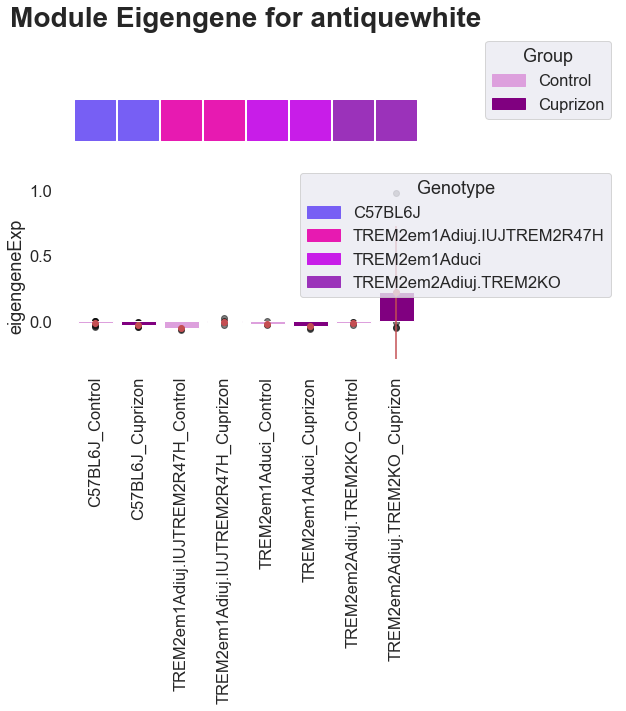

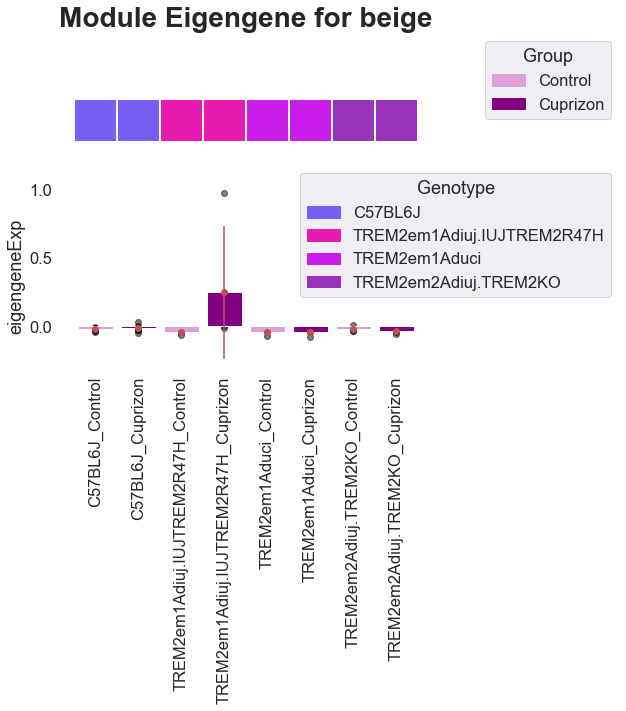

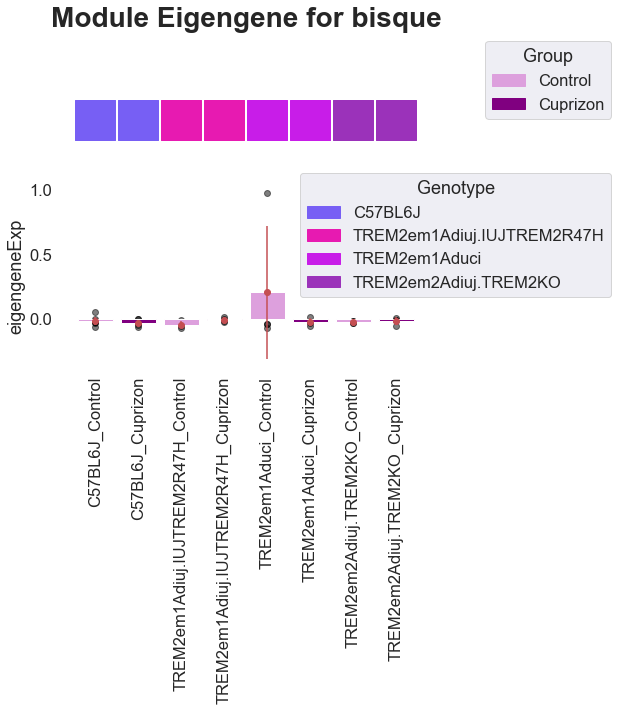

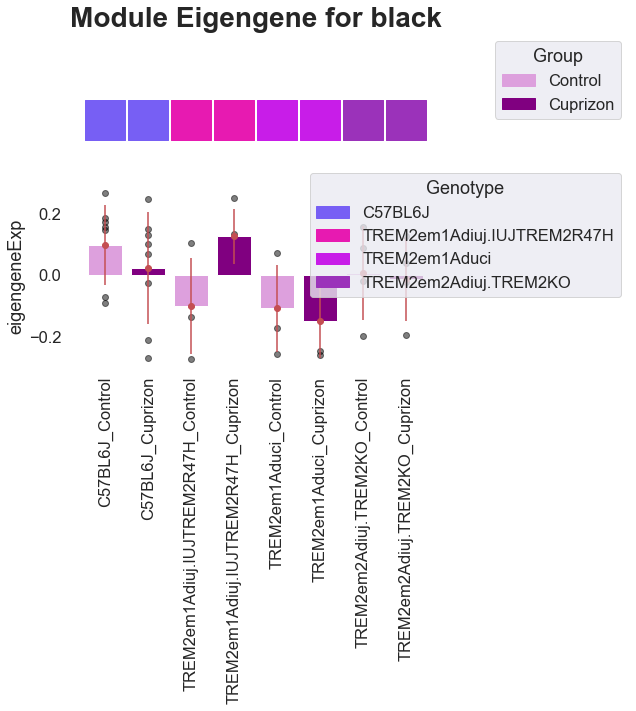

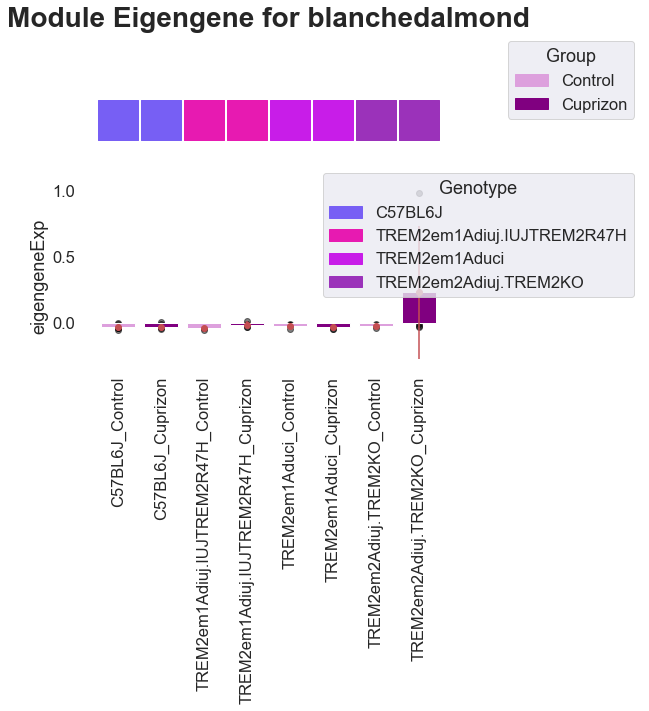

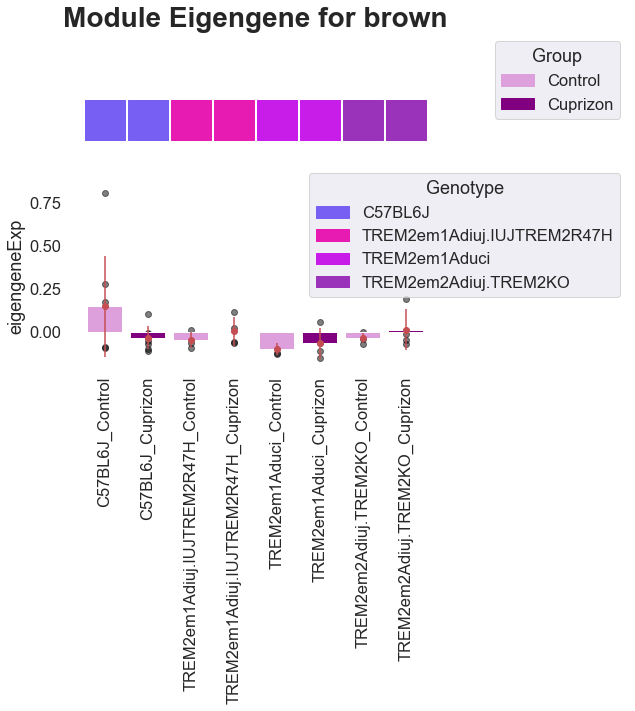

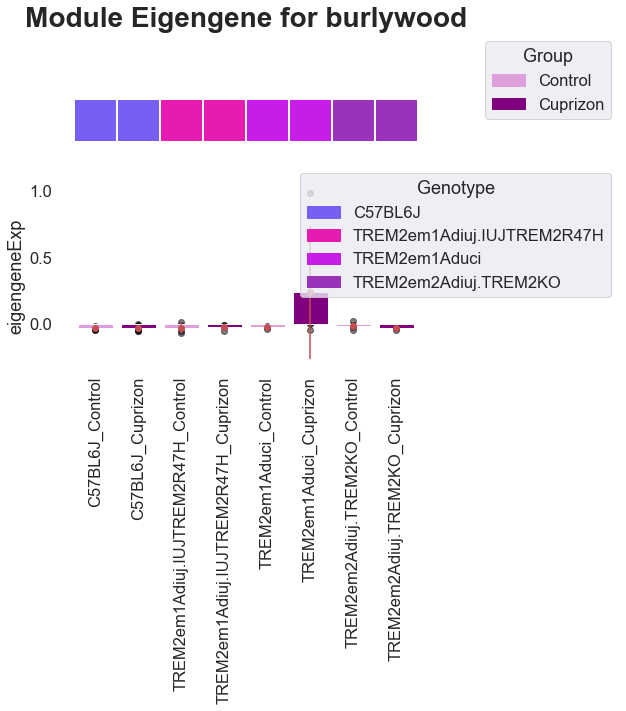

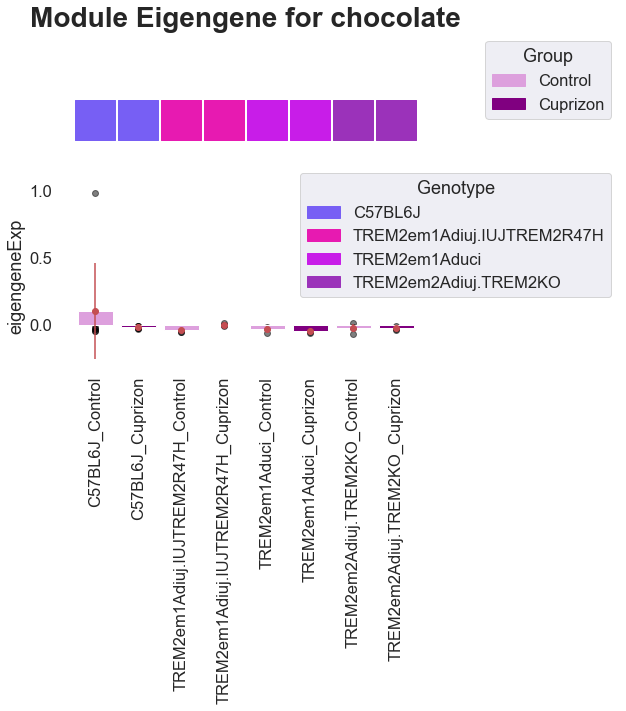

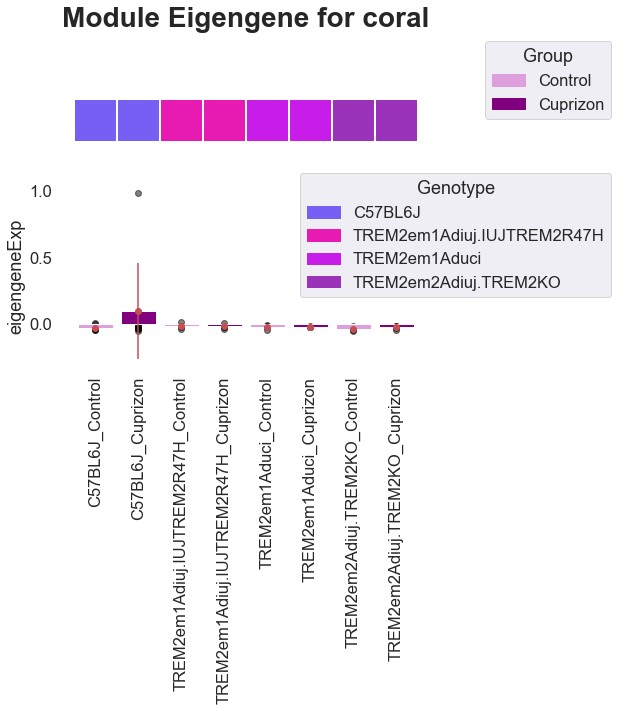

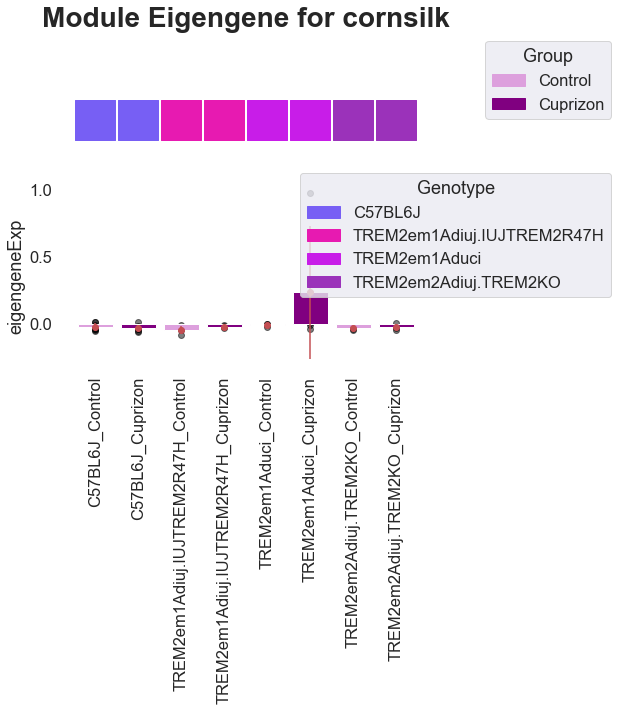

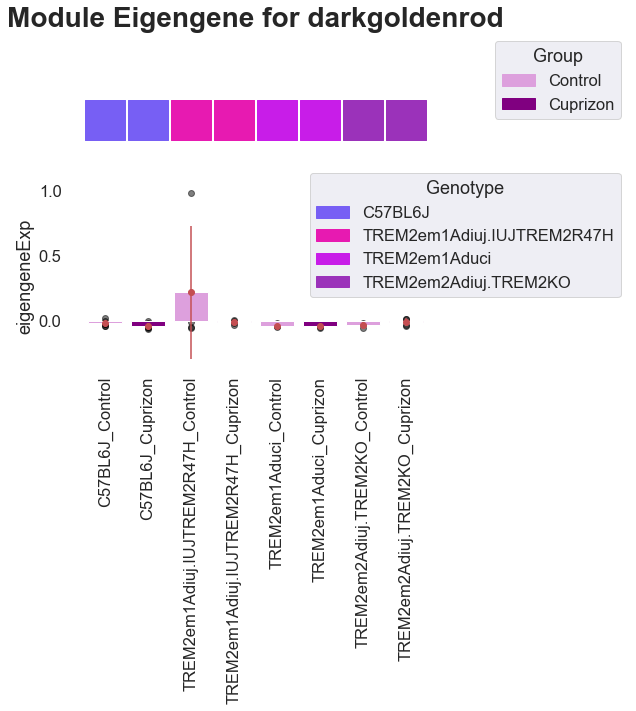

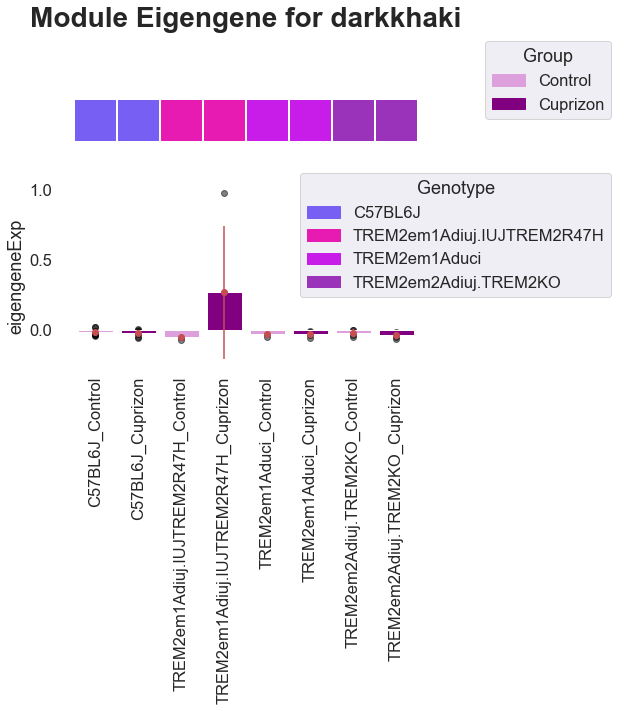

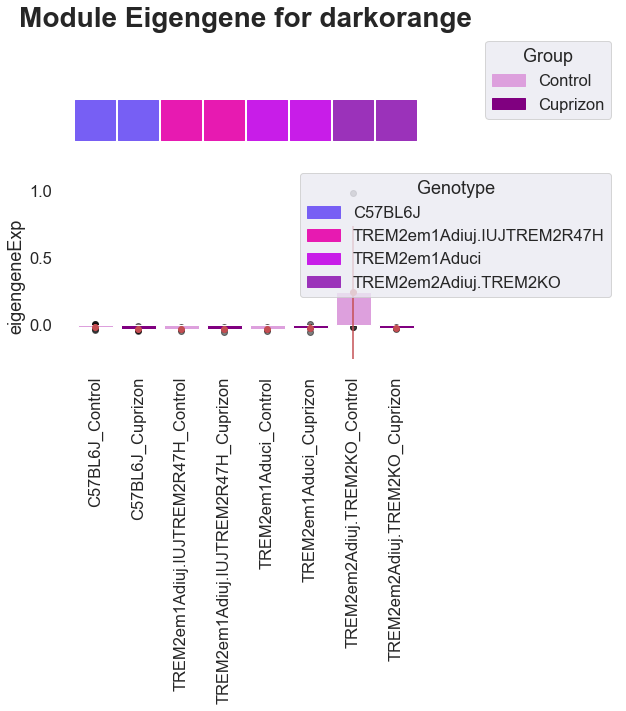

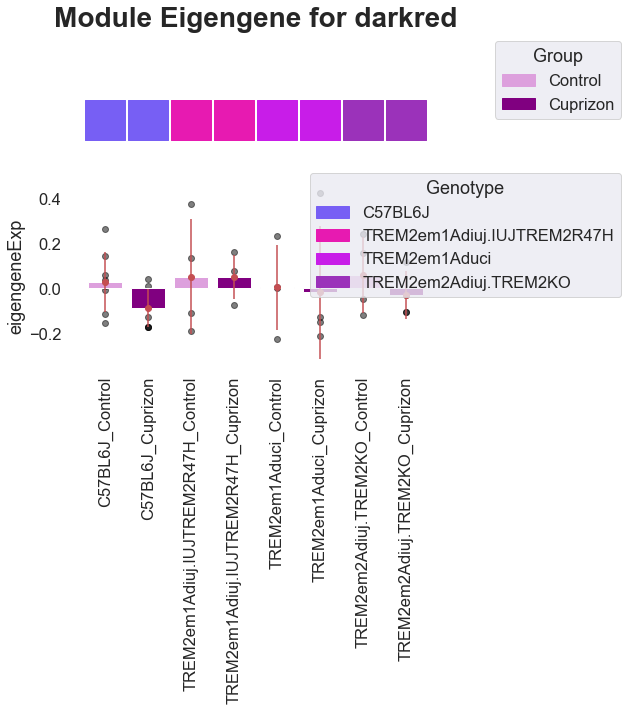

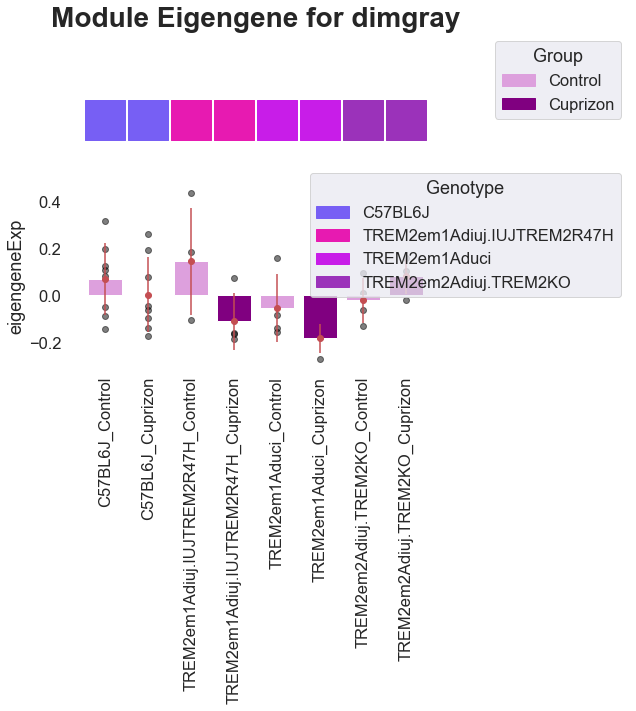

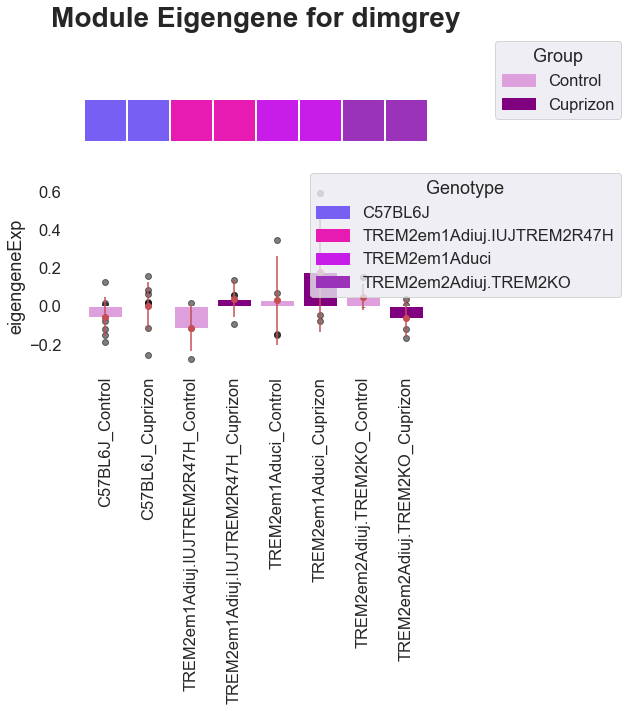

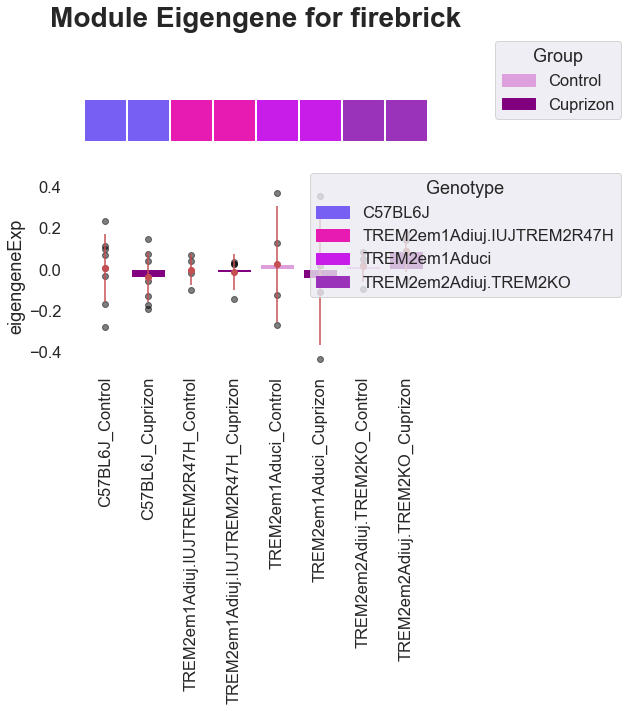

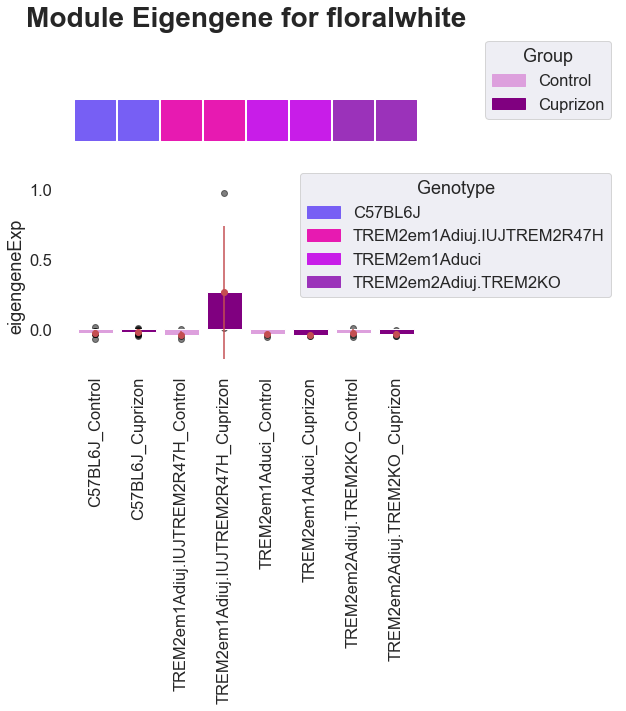

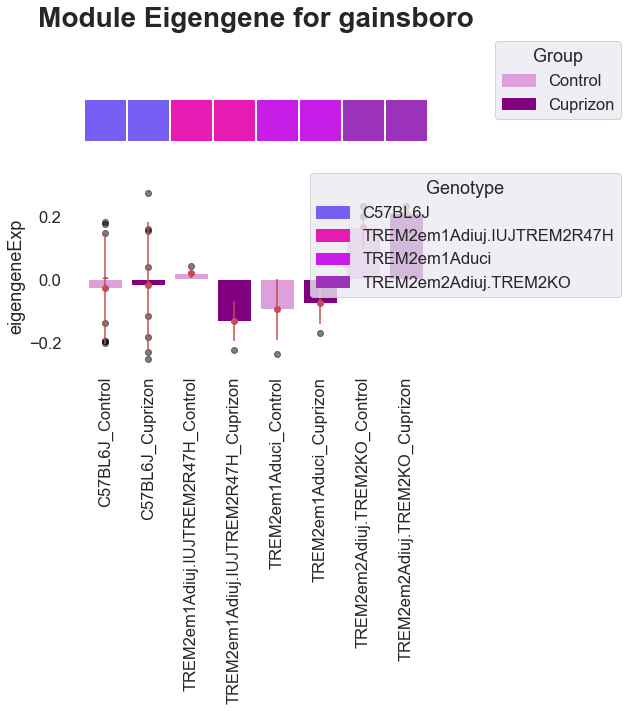

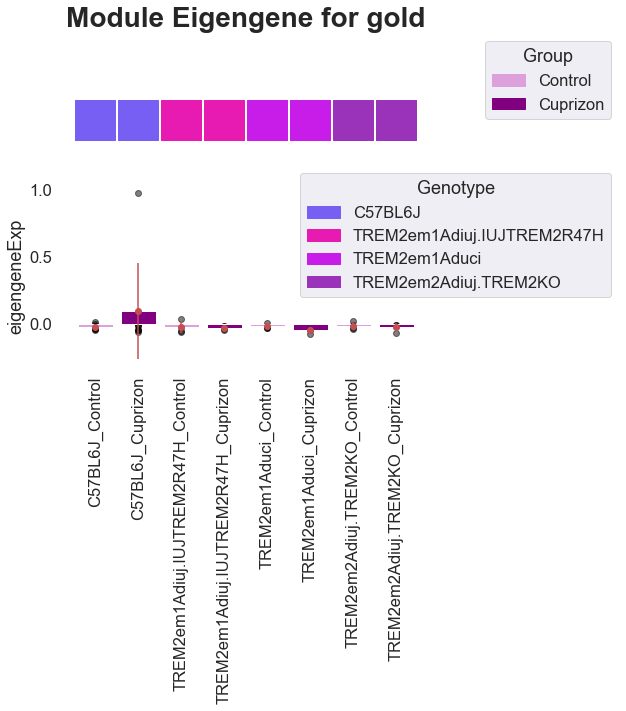

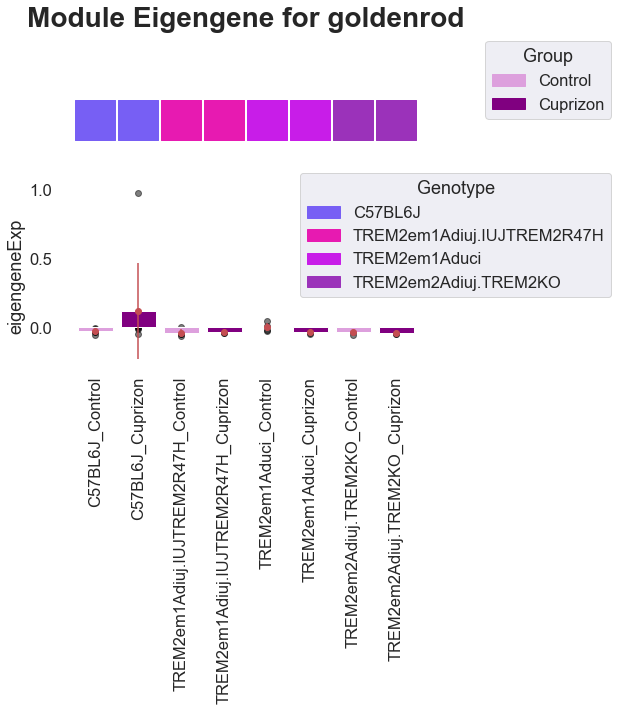

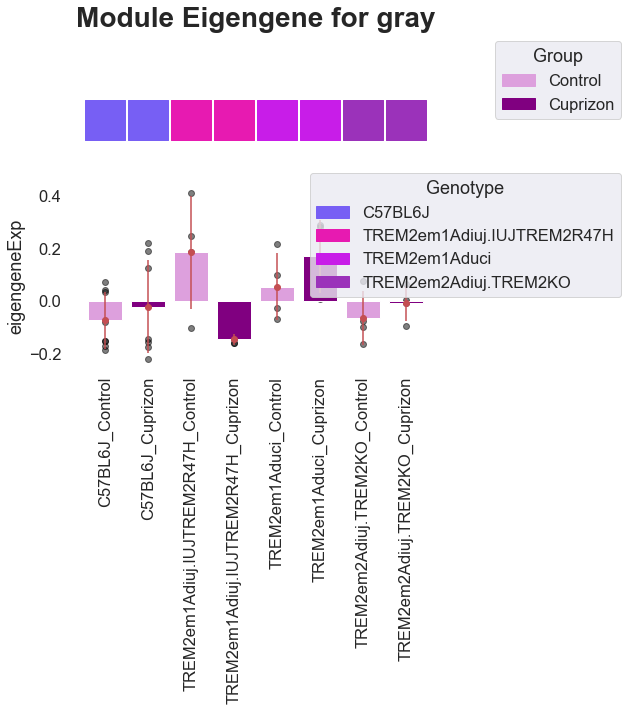

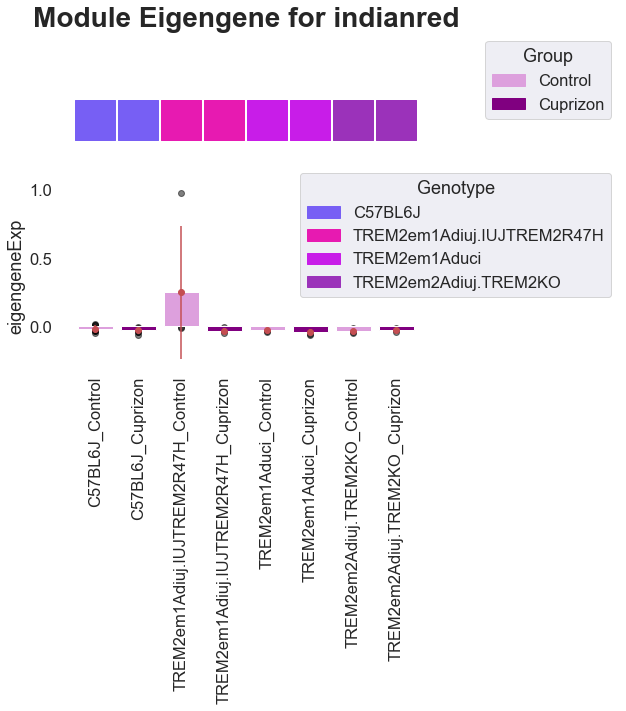

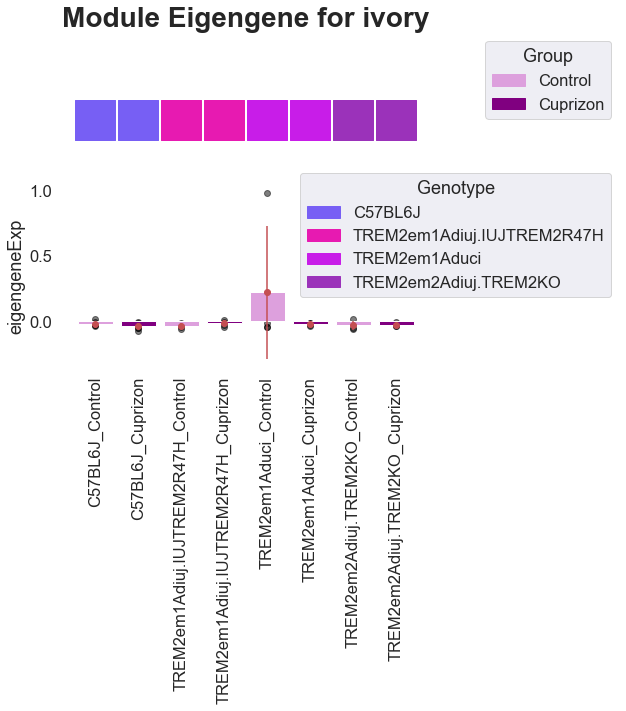

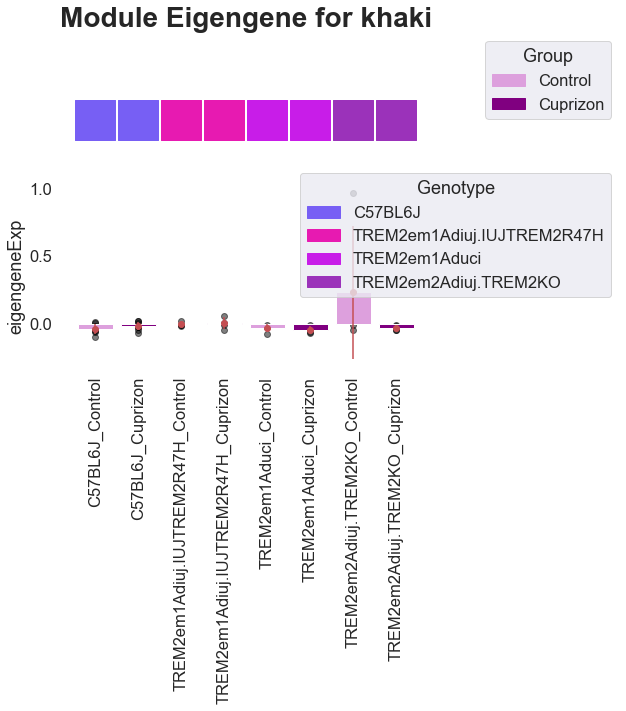

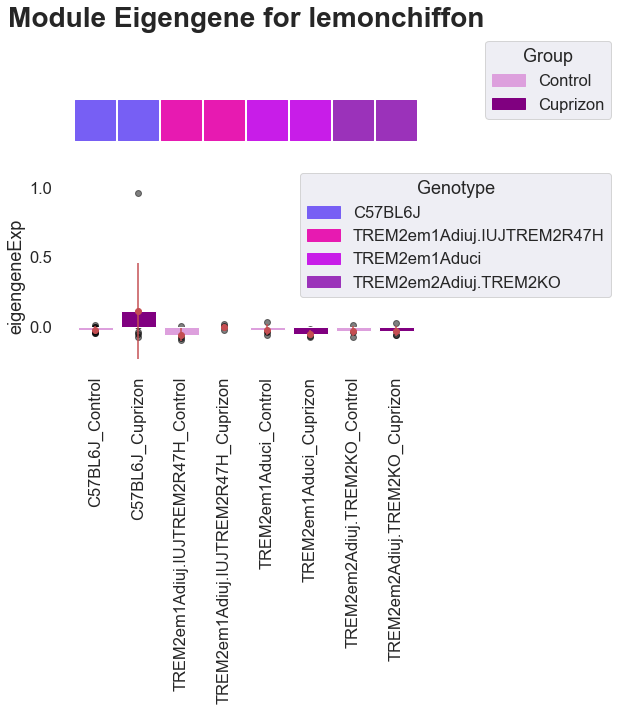

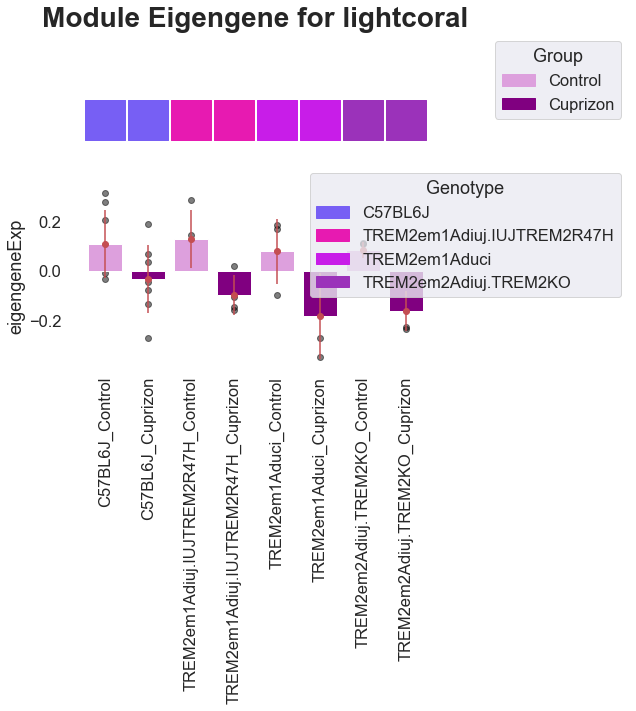

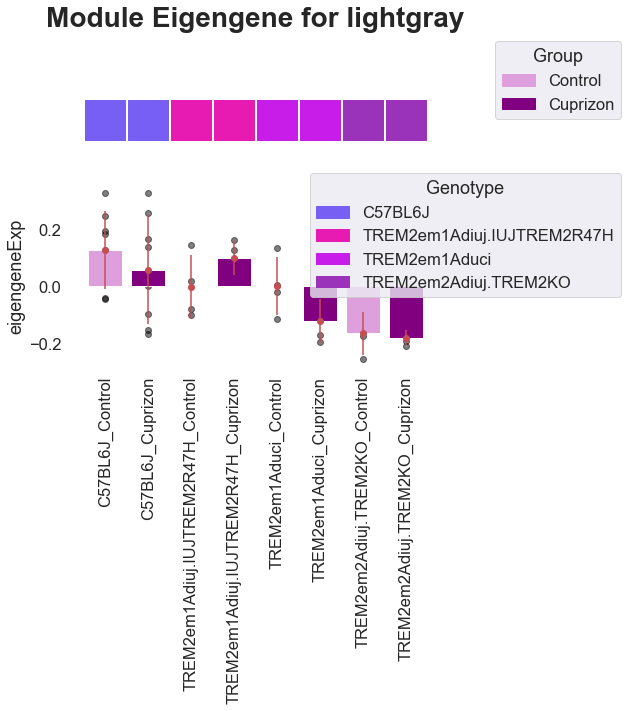

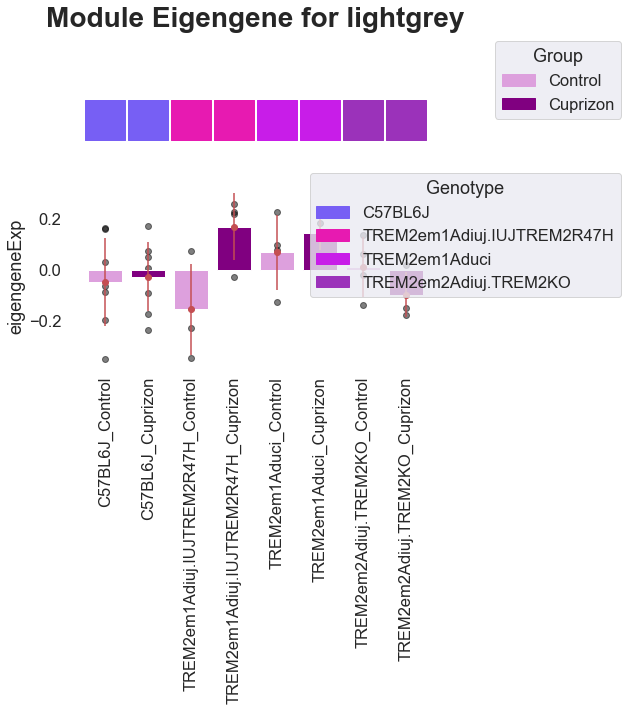

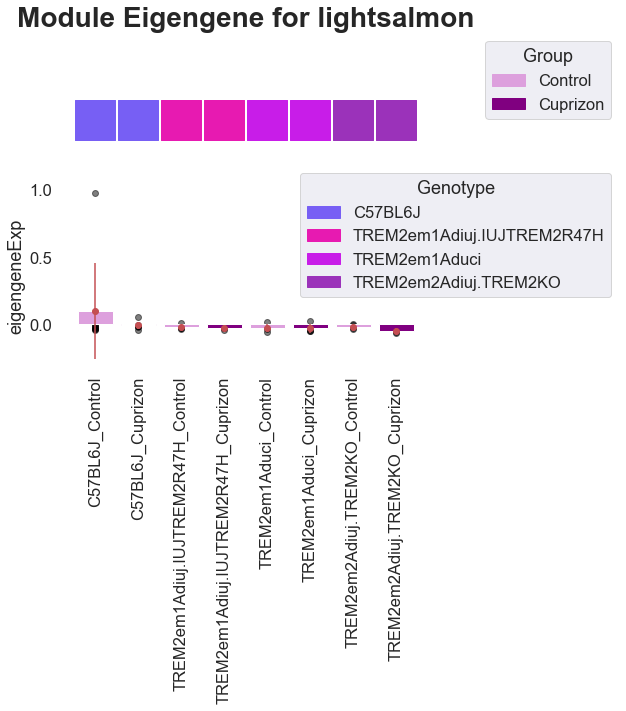

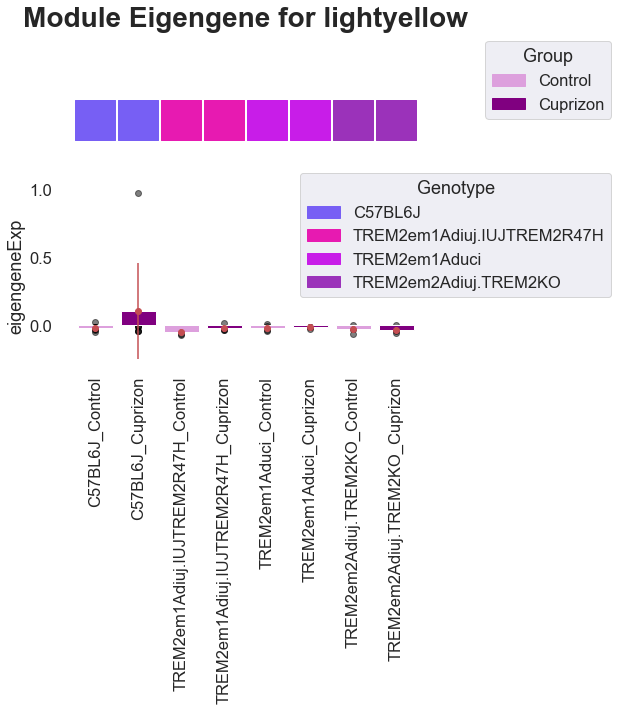

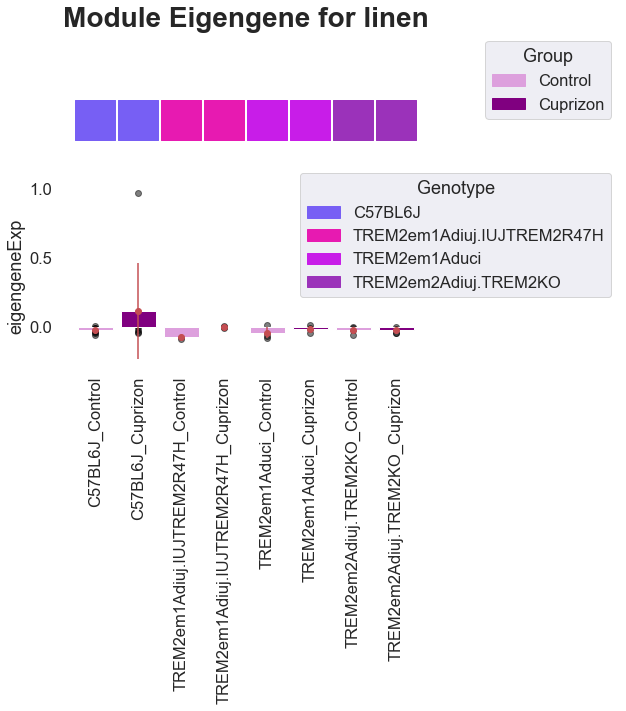

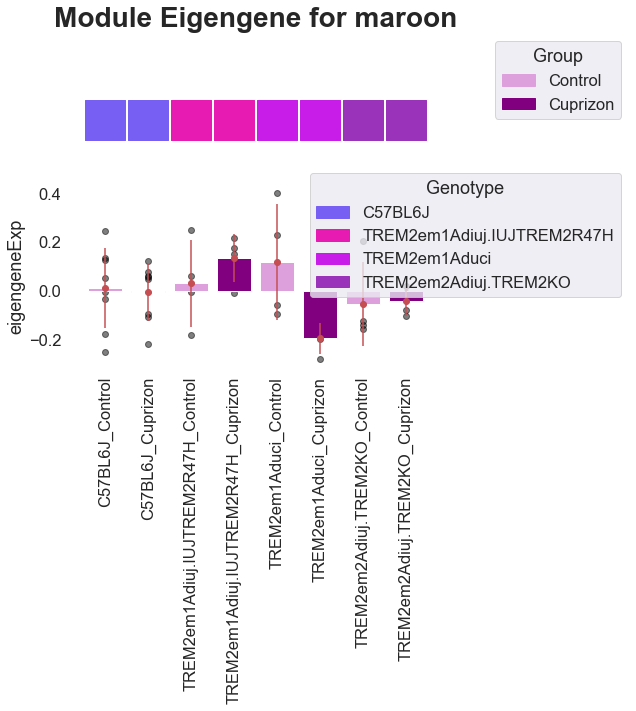

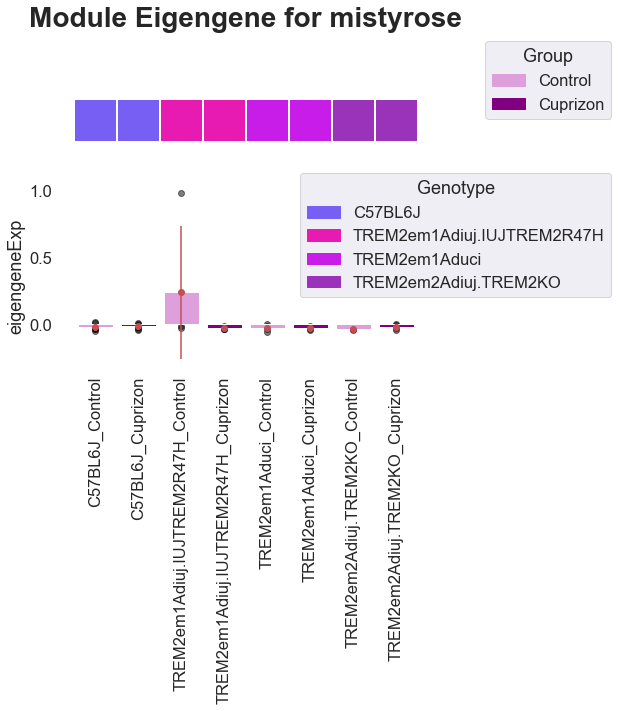

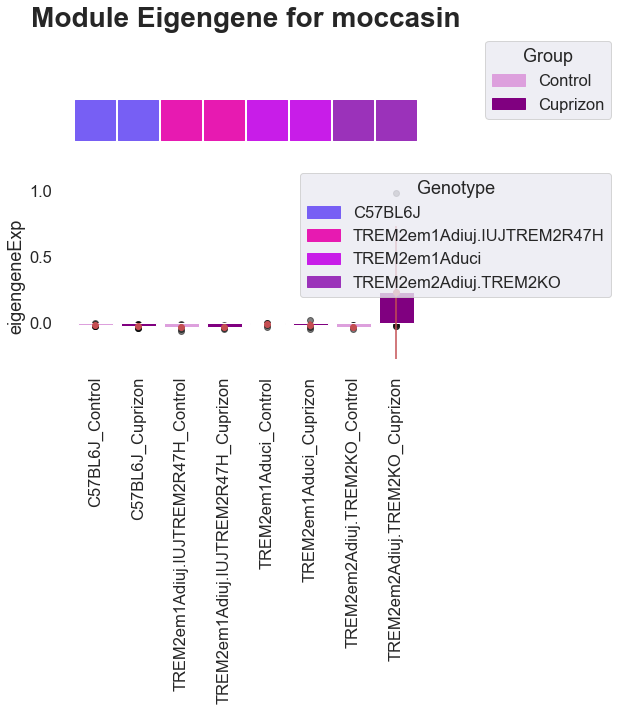

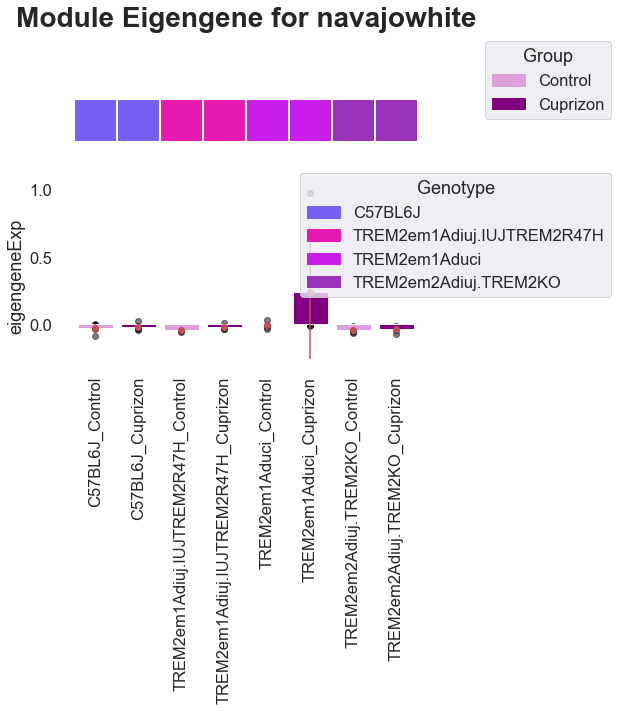

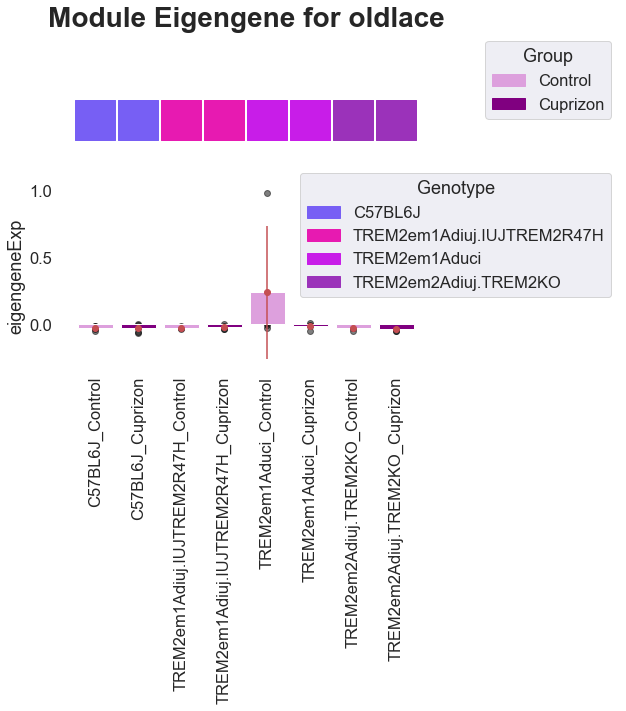

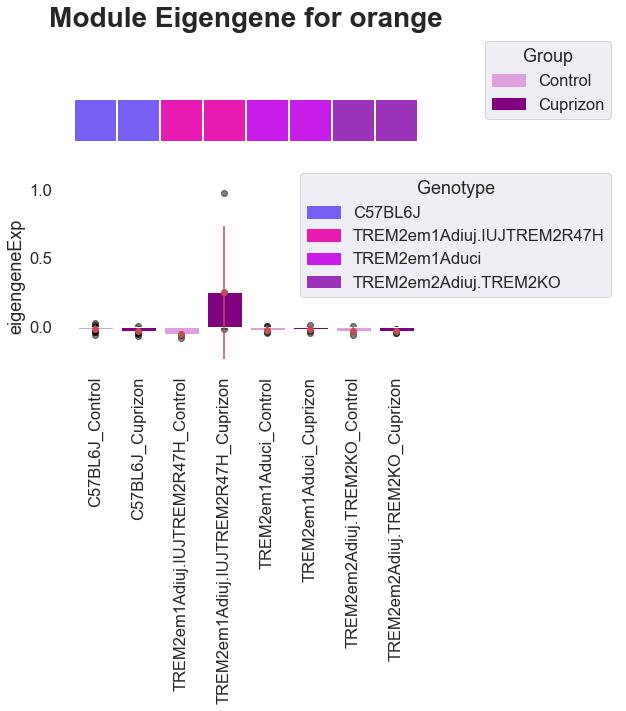

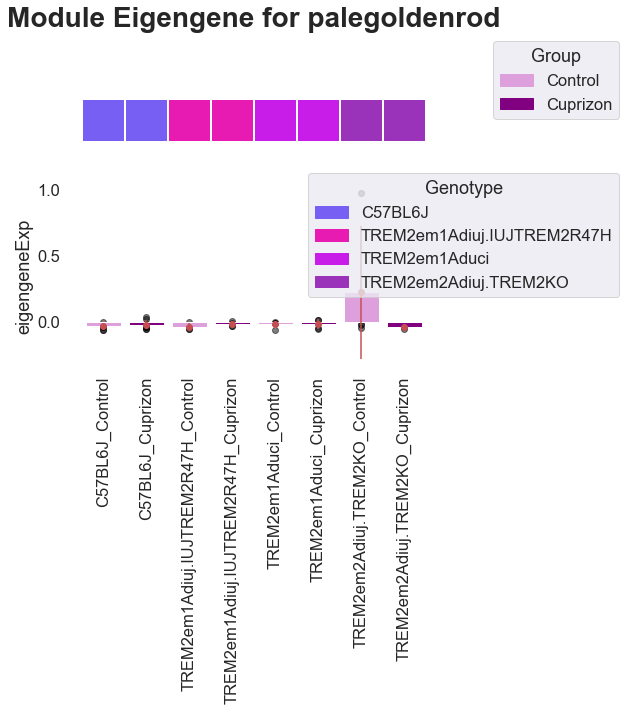

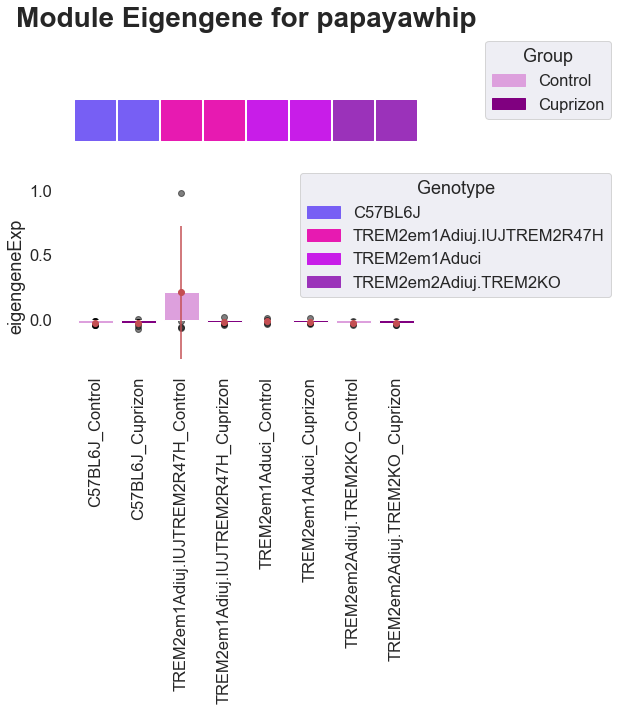

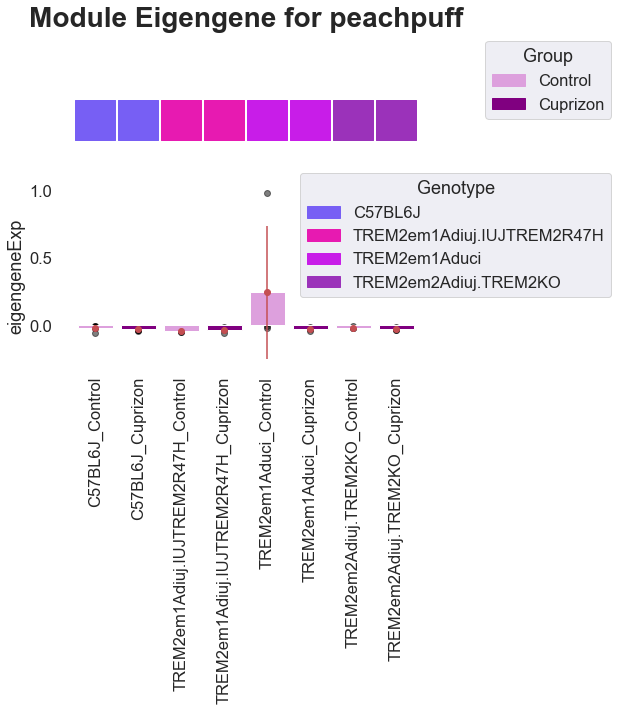

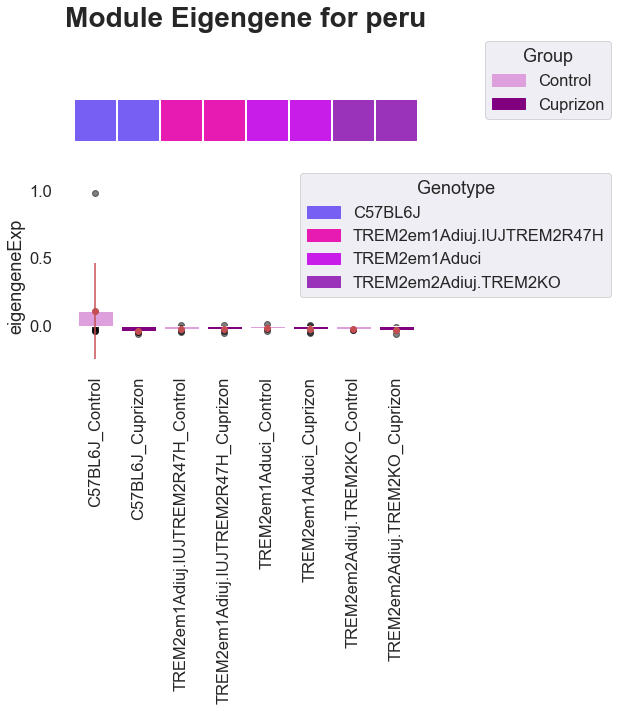

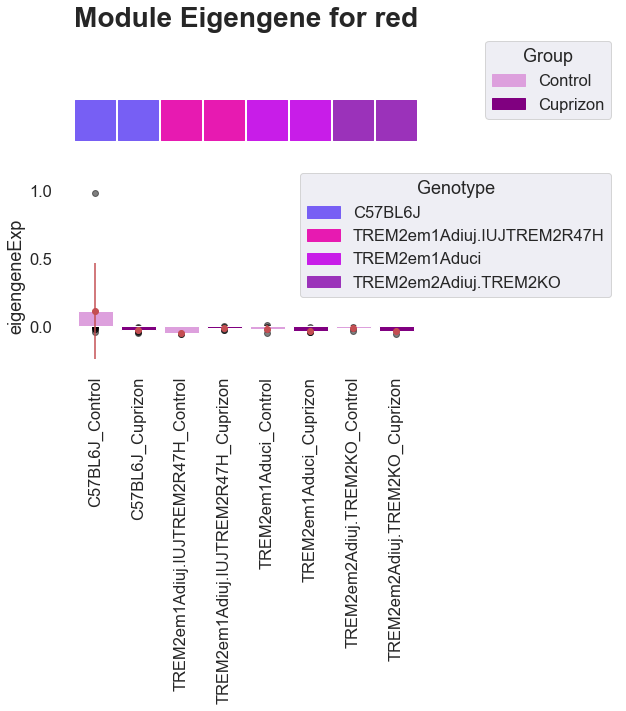

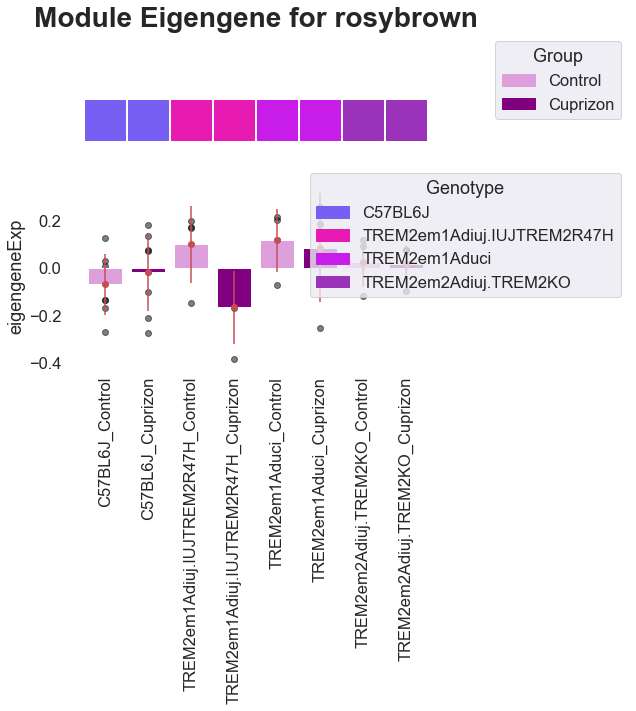

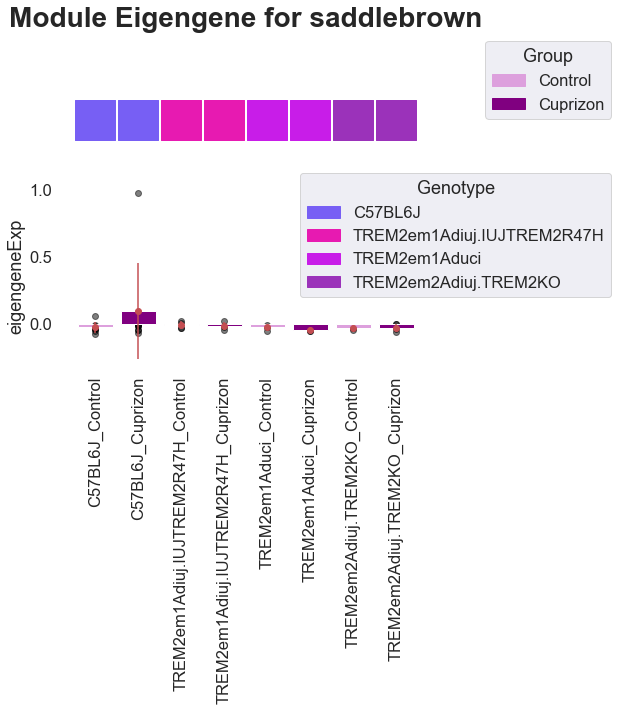

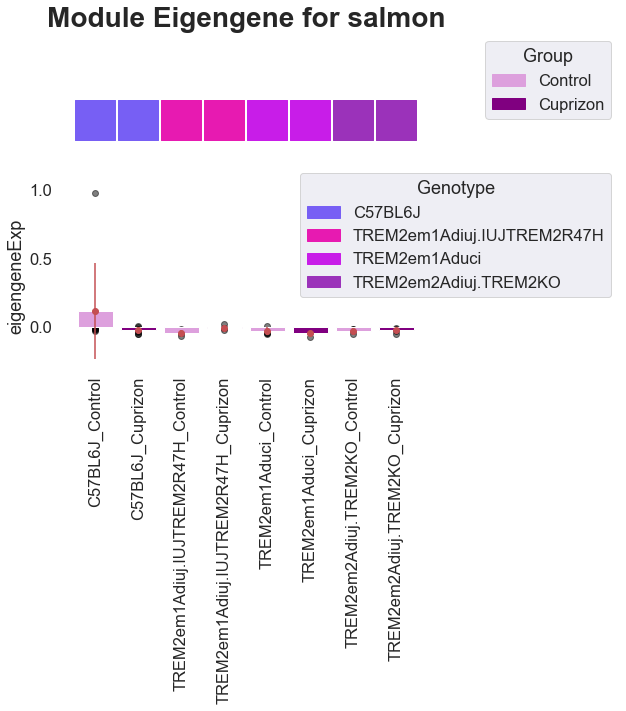

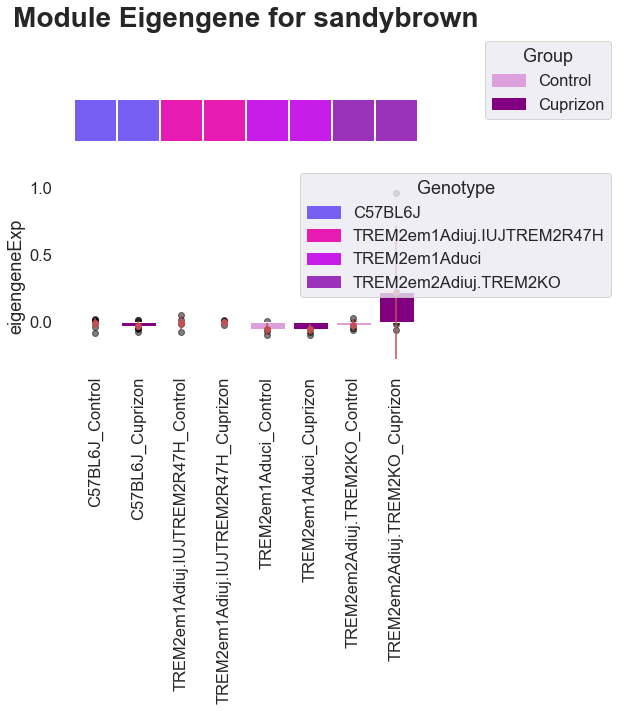

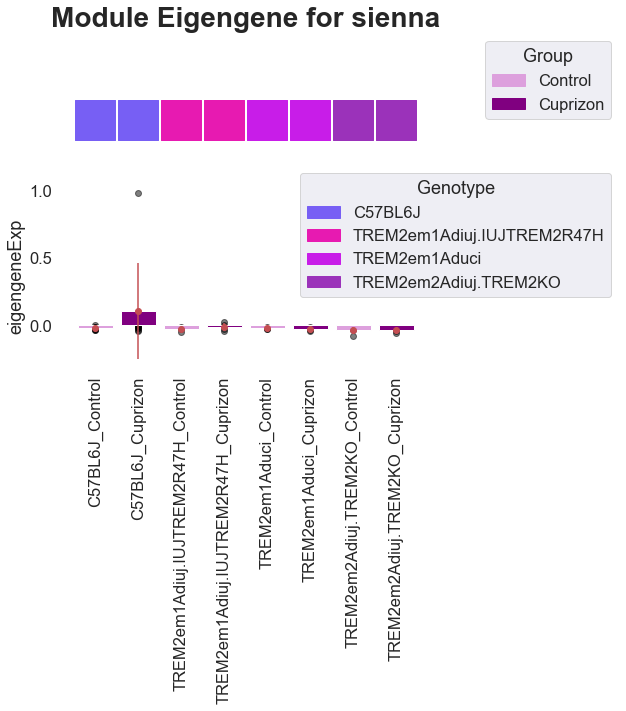

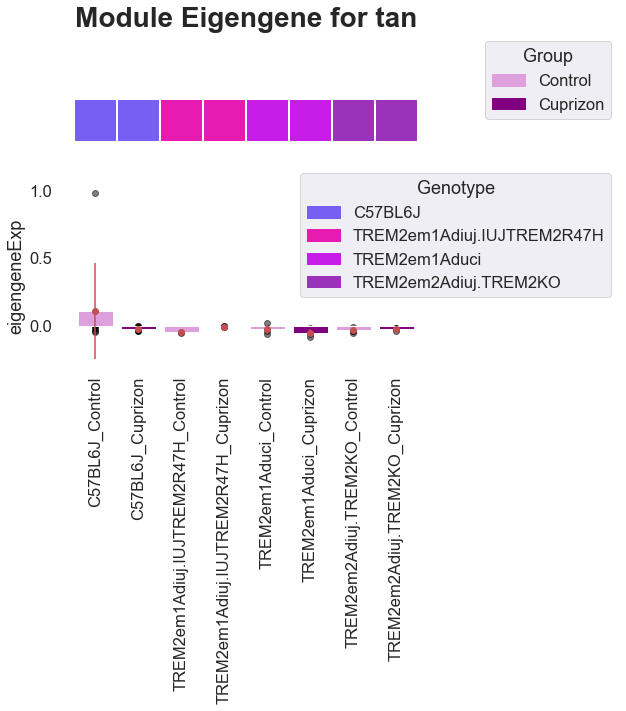

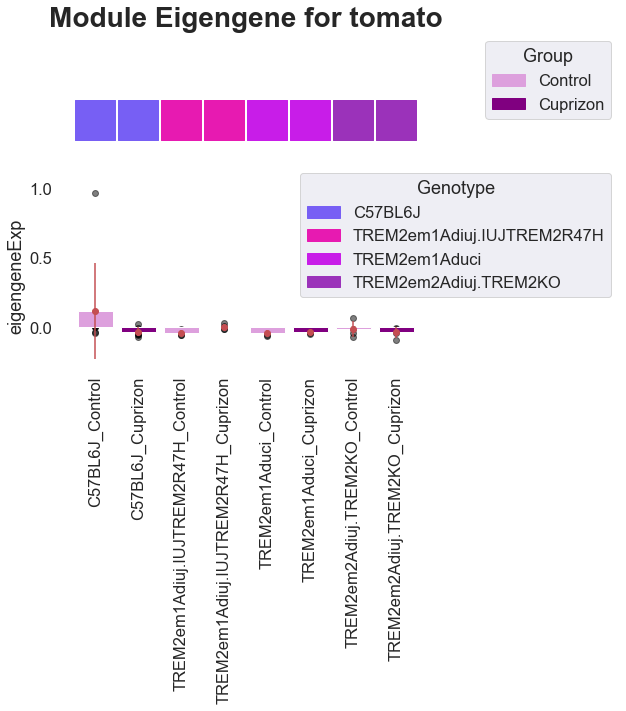

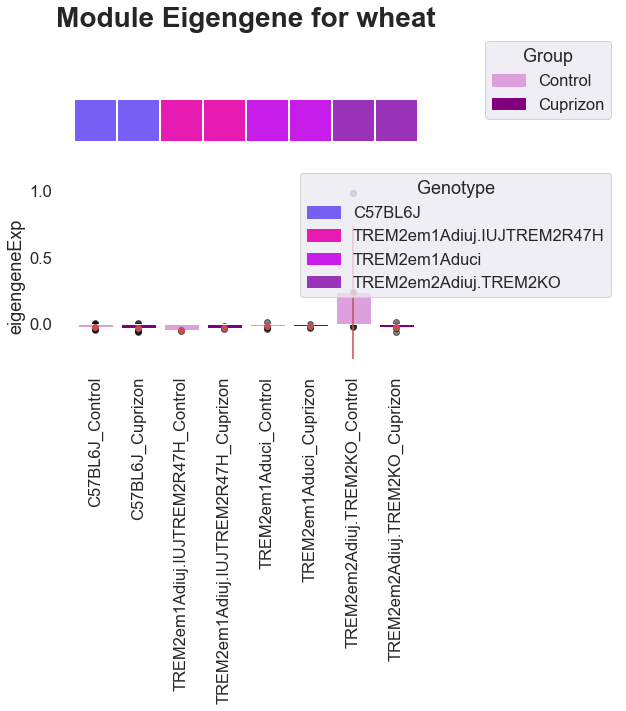

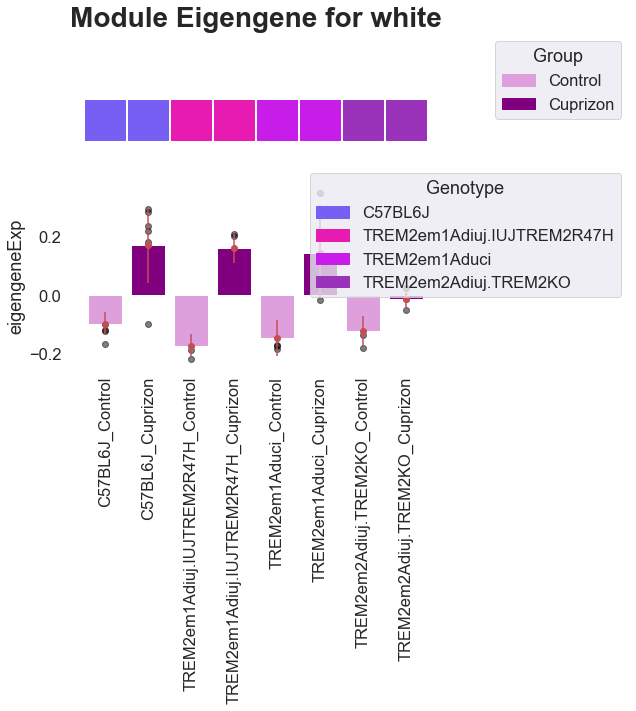

In [61]:
modelAD.updateMetadata(path='data/experimentList_sorted_corrected', 
                       sep='\t')
# add color for metadata
modelAD.setMetadataColor('Genotype', Genotype)
modelAD.setMetadataColor('Group', {'Control': 'plum',
                                 'Cuprizon': 'purple'})

geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                              attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'])

modelAD.analyseWGCNA(geneList=geneList)

## save PyWGCNA object

In [62]:
## save PyWGCNA object
modelAD.saveWGCNA()

Saving WGCNA as modelAD_cuprizone_12mon.p


## Read PyWGCNA object

In [1]:
## Read PyWGCNA object
import PyWGCNA
modelAD = PyWGCNA.readWGCNA("modelAD_cuprizone_12mon.p")

Reading modelAD_cuprizone_12mon WGCNA done!


In [2]:
modelAD.datExpr.var.to_csv(f"modules_{modelAD.name}.csv")

# How to work with object

## Extract gene list for each module and save it as a csv file

In [30]:
# module you're inteseted in it
module = "lightcoral"
module = "white"
geneList = modelAD.datExpr.var[modelAD.datExpr.var.moduleColors == module]
geneList
# save gene list as MODULE.csv near object file
geneList.to_csv(modelAD.outputPath + '/' + module + '.csv')
geneList

gene_id dynamicColors moduleColors  \
gene_id                                                             
ENSMUSG00000000120  ENSMUSG00000000120         white        white   
ENSMUSG00000000275  ENSMUSG00000000275         white        white   
ENSMUSG00000000290  ENSMUSG00000000290         white        white   
ENSMUSG00000000673  ENSMUSG00000000673         white        white   
ENSMUSG00000000682  ENSMUSG00000000682         white        white   
...                                ...           ...          ...   
ENSMUSG00000110631  ENSMUSG00000110631         white        white   
ENSMUSG00000112023  ENSMUSG00000112023         white        white   
ENSMUSG00000112148  ENSMUSG00000112148         white        white   
ENSMUSG00000115529  ENSMUSG00000115529         white        white   
ENSMUSG00000117613  ENSMUSG00000117613         white        white   

                    moduleLabels      gene_name    gene_biotype  
gene_id                                                          
ENSMUSG00000000120            57           Ngfr  protein_coding  
ENSMUSG00000000275            57         Trim25  protein_coding  
ENSMUSG00000000290            57          Itgb2  protein_coding  
ENSMUSG00000000673            57           Haao  protein_coding  
ENSMUSG00000000682            57           Cd52  protein_coding  
...                          ...            ...             ...  
ENSMUSG00000110631            57        Gm42047          lncRNA  
ENSMUSG00000112023            57        Lilrb4b  protein_coding  
ENSMUSG00000112148            57        Lilrb4a  protein_coding  
ENSMUSG00000115529            57  9630013A20Rik          lncRNA  
ENSMUSG00000117613            57         Gm2629          lncRNA  

[517 rows x 6 columns]

## Gene ontology table

In [31]:
import pandas as pd
# module you're inteseted in it
module = "lightcoral"
module = "white"
file_name = modelAD.outputPath + '/figures/Go_term/' + module + '/GO_Biological_Process_2021.Mouse.enrichr.reports.txt'
geneOntoloy = pd.read_csv(file_name, sep='\t')
geneOntoloy

Gene_set  \
0     GO_Biological_Process_2021   
1     GO_Biological_Process_2021   
2     GO_Biological_Process_2021   
3     GO_Biological_Process_2021   
4     GO_Biological_Process_2021   
...                          ...   
2818  GO_Biological_Process_2021   
2819  GO_Biological_Process_2021   
2820  GO_Biological_Process_2021   
2821  GO_Biological_Process_2021   
2822  GO_Biological_Process_2021   

                                                   Term  Overlap  \
0     neutrophil activation involved in immune respo...   66/485   
1                 neutrophil degranulation (GO:0043312)   65/481   
2             neutrophil mediated immunity (GO:0002446)   65/488   
3      cytokine-mediated signaling pathway (GO:0019221)   64/621   
4     cellular response to cytokine stimulus (GO:007...   52/482   
...                                                 ...      ...   
2818                protein ubiquitination (GO:0016567)    6/525   
2819  protein modification by small protein conjugat...    4/409   
2820                           translation (GO:0006412)    1/214   
2821  regulation of transcription, DNA-templated (GO...  39/2244   
2822                       gene expression (GO:0010467)    2/356   

           P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0     5.065495e-29      1.429989e-25            0                     0   
1     2.077605e-28      2.932540e-25            0                     0   
2     4.844665e-28      4.558830e-25            0                     0   
3     1.911380e-21      1.348956e-18            0                     0   
4     1.999608e-18      1.128978e-15            0                     0   
...            ...               ...          ...                   ...   
2818  9.935563e-01      9.949661e-01            0                     0   
2819  9.939813e-01      9.950388e-01            0                     0   
2820  9.963875e-01      9.970939e-01            0                     0   
2821  9.979792e-01      9.983329e-01            0                     0   
2822  9.991109e-01      9.991109e-01            0                     0   

      Odds Ratio  Combined Score  \
0       6.673508      434.795858   
1       6.606153      421.083898   
2       6.494446      408.464981   
3       4.811363      229.533106   
4       4.965958      202.380583   
...          ...             ...   
2818    0.429899        0.002779   
2819    0.368036        0.002222   
2820    0.175678        0.000636   
2821    0.640702        0.001296   
2822    0.210271        0.000187   

                                                  Genes  
0     ARHGAP9;ITGAM;GMFG;HEXB;ITGB2;CTSZ;EPX;CTSS;PY...  
1     ARHGAP9;ITGAM;GMFG;HEXB;ITGB2;CTSZ;EPX;CTSS;PY...  
2     ARHGAP9;ITGAM;GMFG;HEXB;ITGB2;CTSZ;EPX;CTSS;PY...  
3     IFITM3;CD86;CNTF;CDKN1A;SPI1;CSF3R;ITGAM;ITGB2...  
4     CD86;CNTF;CDKN1A;CSF3R;ITGAM;ITGB2;IFIT1;ICAM1...  
...                                                 ...  
2818              MYLIP;RNF25;TRIM25;UBE2L6;FBXO7;PSMB8  
2819                             MYLIP;UFM1;RNF25;FBXO7  
2820                                              EEF1D  
2821  CD86;CDKN1A;SPI1;NCF1;CEBPD;DBX2;HMGB2;IKZF1;L...  
2822                                       APOBEC1;HHEX  

[2823 rows x 10 columns]

## Show plots

For looking at each of them, you need to copy and paset it in the markdown cell (like the one I put it below)

* Module-traitRelationships: 
`![Module-traitRelationships](figures/Module-traitRelationships.png)`

* Module heatmap eigengene: you need change the module name to be your interested module
`![Module heatmap eigengene](figures/ModuleHeatmapEigengeneblack.png)`

* Module barplot Eigengene: you need change the module name to be your interested module
`![Module barplot eigengene](figures/barplot_black.png)`

* Gene ontology plot: you need change the module name to be your interested module
`![Module GO Term](figures/Go_term/black.png)`

![Module GO Term](figures/Go_term/dimgrey.png)

In [12]:
import pandas as pd
# module you're inteseted in it
module = "lightcoral"
#module = "white"
ME = pd.DataFrame(modelAD.datME["ME" + module].values, columns=['eigengeneExp'])
ME['sample_name'] = modelAD.datME.index
ME.to_csv(f"datME_{module}.csv")